In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

import tflearn
import tensorflow as tf
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [3]:
TRAIN_DIR = "./train"
TEST_DIR = "./test"
IMG_SIZE = 64
LR = 0.0003
MODEL_NAME = "catdog-{}-{}.model".format(LR, "12conv-1full-2")

tf.reset_default_graph()

net = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name="input")
net = conv_2d(net, 16, 7, activation="relu")
net = conv_2d(net, 32, 5, activation="relu")
net = conv_2d(net, 64, 3, activation="relu")
net = max_pool_2d(net, 5)

net = conv_2d(net, 16, 7, activation="relu")
net = conv_2d(net, 32, 5, activation="relu")
net = conv_2d(net, 64, 3, activation="relu")
net = max_pool_2d(net, 5)

net = conv_2d(net, 16, 5, activation="relu")
net = conv_2d(net, 32, 5, activation="relu")
net = conv_2d(net, 64, 5, activation="relu")
net = max_pool_2d(net, 2)

net = conv_2d(net, 16, 3, activation="relu")
net = conv_2d(net, 32, 3, activation="relu")
net = conv_2d(net, 64, 3, activation="relu")
net = max_pool_2d(net, 2)

net = fully_connected(net, 1024, activation="relu")
net = dropout(net, 0.6)

net = fully_connected(net, 2, activation="softmax")
net = regression(
    net, 
    optimizer="adam", 
    learning_rate=LR, 
    loss="categorical_crossentropy",
    name="targets",
    restore=False
)

model = tflearn.DNN(net, tensorboard_dir="log")

In [4]:
model.load("model/"+MODEL_NAME, weights_only=True)

INFO:tensorflow:Restoring parameters from C:\Users\WinterJ\Documents\GitHub\python\Code_Study\Machine_Learning\Cat_Dog\model\catdog-0.0003-12conv-1full-2.model


In [12]:
test_data = []
show_data = []
ls = ["cat1.jpg", "cat2.jpg", "cat3.jpg", "dog1.jpg", "dog2.jpg", "dog3.jpg"]
for path in tqdm(ls):
    test = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    test = cv2.resize(test, (IMG_SIZE, IMG_SIZE))
    show = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    test_data.append(test)
    show_data.append(show)

100%|████████████████████████████████████████| 6/6 [00:00<00:00, 139.55it/s]


In [7]:
model.predict([test_data[0].reshape(64, 64, 1)])

array([[ 0.37302995,  0.62696999]], dtype=float32)

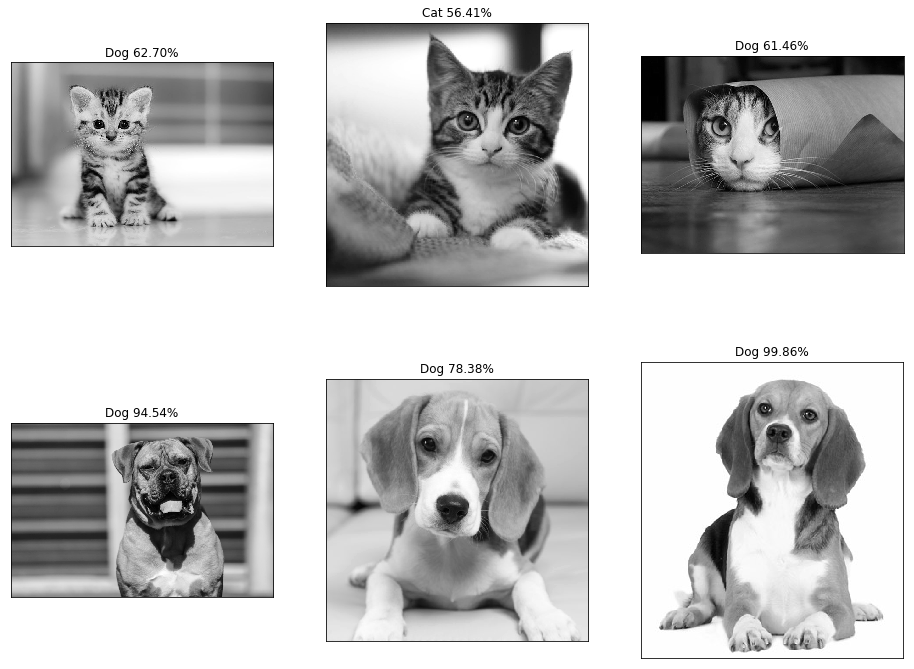

In [16]:
fig = plt.figure(figsize=(16, 12))
for num, data in enumerate(test_data):
    
    subplot = fig.add_subplot(2, 3, num+1)
    img = data.reshape(IMG_SIZE, IMG_SIZE, 1)
    predict = model.predict([img])[0]
    
    if np.argmax(predict) == 1:
        label = "Dog {:.2f}%".format(float(max(predict)) * 100)
    else:
        label = "Cat {:.2f}%".format(float(max(predict)) * 100)
        
    subplot.imshow(show_data[num], cmap="gray")
    plt.title(label)
    subplot.axes.get_xaxis().set_visible(False)
    subplot.axes.get_yaxis().set_visible(False)
plt.show();